In [1]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_PATH = '../data/'
df = pd.read_csv(DATA_PATH + 'Medical Cost Personal Datasets/insurance.csv')

# Exploratory Data analysis (EDA)
### EDA - Data shape and completeness
* Feature types
* Missing values
* Unique value counts

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

__Numerical variables__ (4) : Age, Bmi, Children, Charges

__Binary variables__ (1) : Smoker

__Categorical variables__ (2) : Sex (2 values), Region (4 values)

*Side note: I chose to treat the Sex variable as categorical rather than binary, ignoring the binary nature of the observations in this specific dataset.*

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
pd.DataFrame(df.isnull().sum()).rename(columns={0: "null values"}).T

,age,sex,bmi,children,smoker,region,charges
null values,0,0,0,0,0,0,0


There is no missing values in this dataset : no imputation needed !

Let's observe the correlation between the features and the target variable. To see the correlation of the categorical variables, they must be encoded first.

In [11]:
from sklearn.preprocessing import LabelEncoder#, OneHotEncoder
le = LabelEncoder()

# Encode the binary variable
# le.fit(df.smoker)
df.smoker = le.fit_transform(df.smoker)

# Encode the categorical variables

df = pd.get_dummies(data=df, columns=["sex", "region"])
df["charges"] = df.pop("charges") # placing the target variable back as the last column of the dataframe

# target_var = df["charges"]
# df.drop(columns=["charges"])
# df["charges"] = target_var

# ohe = OneHotEncoder(categorical_features = df.columns.get_indexer(["sex", "region"]))

# df = ohe.fit_transform(df)

# ohe.fit(df.sex)
# df.sex = ohe.transform(df.sex)

# ohe.fit(df.region)
# df.region = ohe.transform(df.region)

In [12]:
df.head()

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,True,False,False,False,False,True,16884.92400
1,18,33.770,1,0,False,True,False,False,True,False,1725.55230
2,28,33.000,3,0,False,True,False,False,True,False,4449.46200
3,33,22.705,0,0,False,True,False,True,False,False,21984.47061
4,32,28.880,0,0,False,True,False,True,False,False,3866.85520


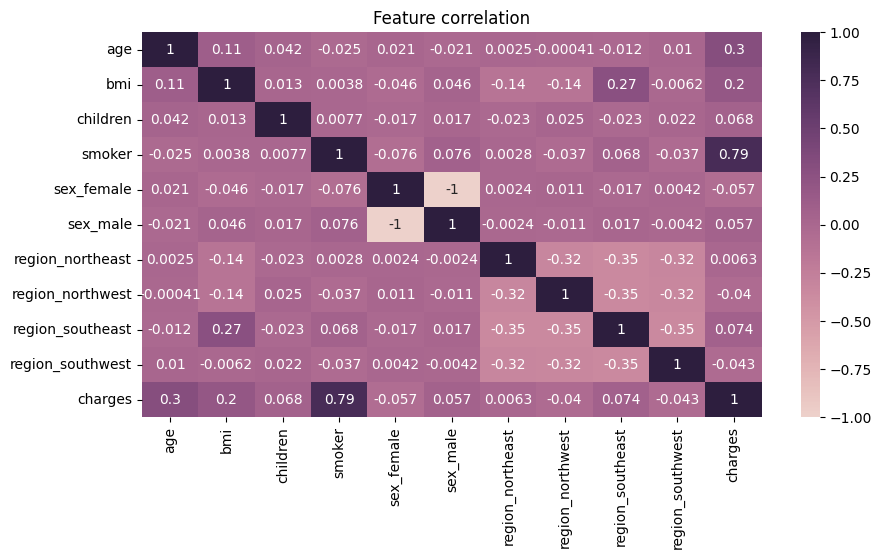

In [13]:
corr = df.corr(numeric_only=False)

f, ax = pl.subplots(figsize=(10, 5))
ax.set_title("Feature correlation")
sns.heatmap(corr, cmap = sns.cubehelix_palette(as_cmap=True), annot= True);

In [14]:
print("Correlation with charges, descending order")
df.corr()["charges"].sort_values(ascending=False)[1:]

Correlation with charges, descending order


smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
Name: charges, dtype: float64

Smoking has a strong correlation to the charges. Interestingly, it seems that the southeast region has some correlation with the BMI. Since BMI itself has some correlation with the target variable, it could partially explain why the southeast region has more correlation than the other regions with the target variable as well.

### EDA - Data distribution

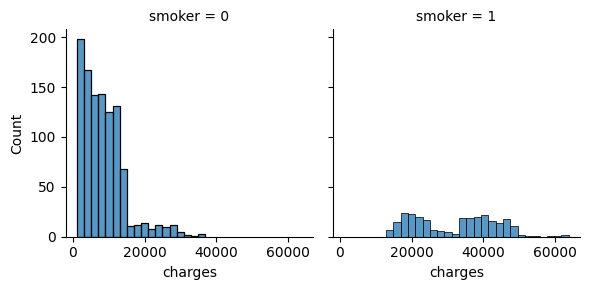

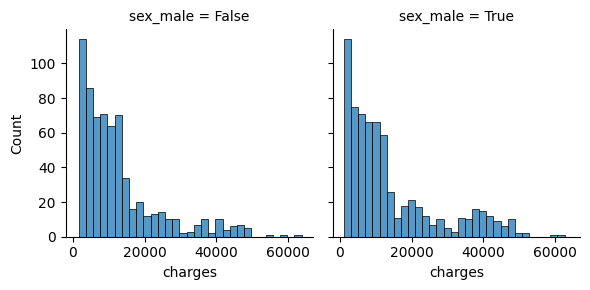

In [17]:
# sns.histplot(data=df, x="charges")
# sns.histplot(data=df, x="charges")

g = sns.FacetGrid(df, col="smoker")
g.map(sns.histplot, "charges", binwidth=2000)

g = sns.FacetGrid(df, col="sex_male")
g.map(sns.histplot, "charges", binwidth=2000)

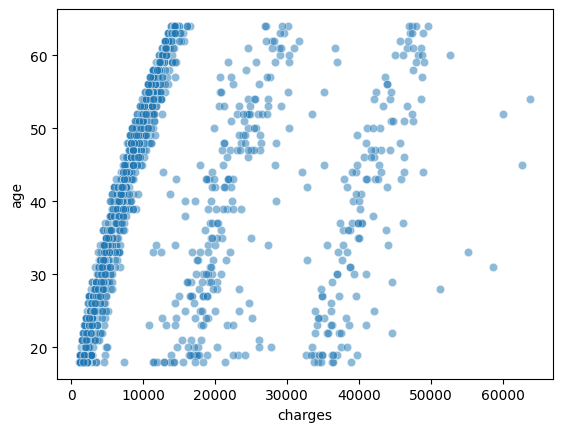

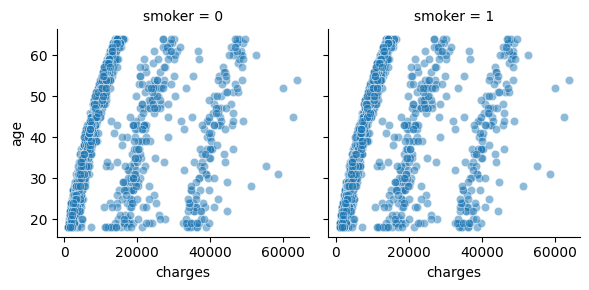

In [18]:
sns.scatterplot(data=df, x="charges", y="age", alpha=.5)

g = sns.FacetGrid(df, col="smoker")
g.map(sns.scatterplot, data=df, x="charges", y="age", alpha=.5)

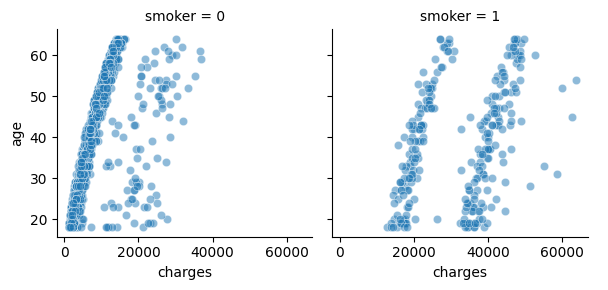

In [19]:
g = sns.FacetGrid(df, col="smoker")
g.map(sns.scatterplot, "charges", "age", alpha=.5)
g.add_legend()

<Axes: xlabel='charges', ylabel='bmi'>

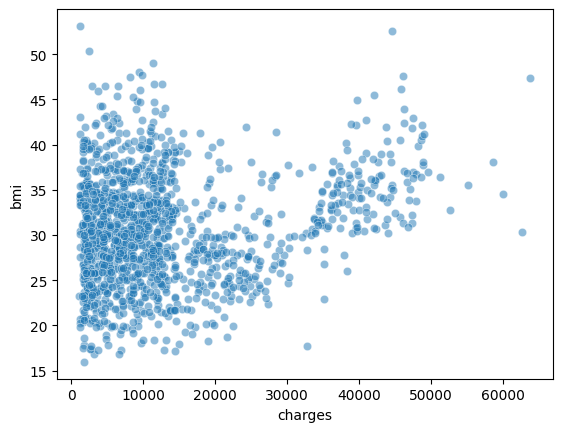

In [20]:
sns.scatterplot(data=df, x="charges", y="bmi", alpha=.5)